In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
data=pd.read_csv("train_p.csv")
test_data=pd.read_csv('test_p.csv')

In [3]:
data.head(
)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


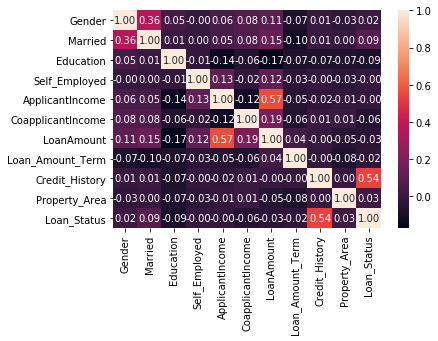

In [69]:
import seaborn as sns
c = data.corr()
ax = sns.heatmap(c, fmt = '.2f', annot=True)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


in the above cell we see that the outliers are there in the data bcause the 75% values lie in the range abd the max valus areextreamly high and we will consider them as an outliers

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

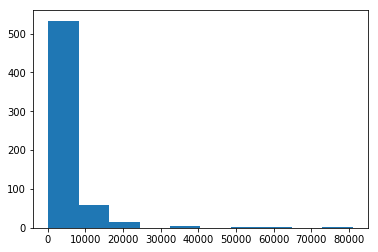

In [5]:
plt.hist(data['ApplicantIncome'])

In the applicant income there are outliers by checking thus garph we can see that most values include in 25000 range 

{'whiskers': [<matplotlib.lines.Line2D at 0x20fcb3f8518>,
 'caps': [<matplotlib.lines.Line2D at 0x20fcb3f8dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fcb3f83c8>],
 'medians': [<matplotlib.lines.Line2D at 0x20fcb404668>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fcb404a90>],
 'means': []}

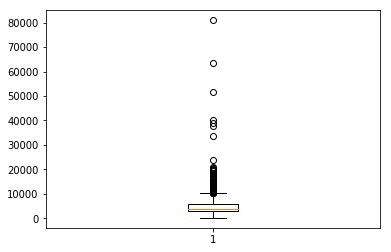

In [6]:
plt.boxplot(data['ApplicantIncome'])

The important thing is to check the null values and irrevelent values in data there are some null values in data

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

now we will fill the missing values with the mean median or mode methods

In [8]:
from scipy.stats import mode
data=data.set_index('Loan_ID')


In [9]:
data["Married"].fillna(value='Yes',inplace=True)

In [10]:
data["Gender"].fillna(value='Male',axis=0,inplace=True)

In [11]:
data["Self_Employed"].fillna(value='No',axis=0,inplace=True)

In [12]:
data['LoanAmount'].fillna(value=128.0,axis=0,inplace=True)

In [13]:
data['Loan_Amount_Term'].fillna(value=360,axis=0,inplace=True)

In [14]:
data["Credit_History"].fillna(value=1.0,axis=0,inplace=True)

In [15]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
data["Dependents"]=data["Dependents"].replace('3+','3')


In [17]:
data["Dependents"].fillna(value=0,inplace=True,axis=0)

In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
test_data["Married"].fillna(value='Yes',inplace=True)
test_data["Gender"].fillna(value='Male',axis=0,inplace=True)
test_data['LoanAmount'].fillna(value=128.0,axis=0,inplace=True)
test_data["Self_Employed"].fillna(value='No',axis=0,inplace=True)
test_data['Loan_Amount_Term'].fillna(value=360,axis=0,inplace=True)
test_data["Credit_History"].fillna(value=1.0,axis=0,inplace=True)
test_data["Dependents"]=data["Dependents"].replace('3+','3')
test_data["Dependents"].fillna(value=0,inplace=True,axis=0)
test_data=test_data.set_index('Loan_ID')

In [20]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

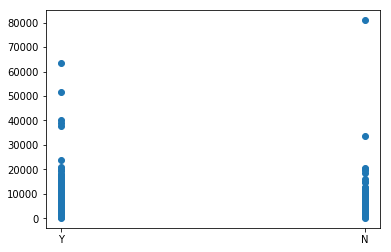

In [21]:
plt.scatter(data['Loan_Status'],data['ApplicantIncome'])


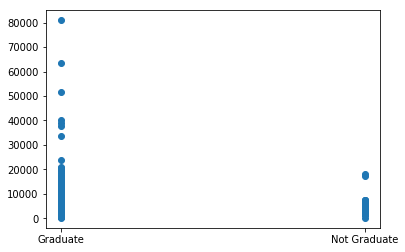

In [22]:
plt.scatter(data['Education'],data['ApplicantIncome'])


{'whiskers': [<matplotlib.lines.Line2D at 0x20fcb520588>,
 'caps': [<matplotlib.lines.Line2D at 0x20fcb520e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fcb520438>],
 'medians': [<matplotlib.lines.Line2D at 0x20fcb52a6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fcb52ab00>],
 'means': []}

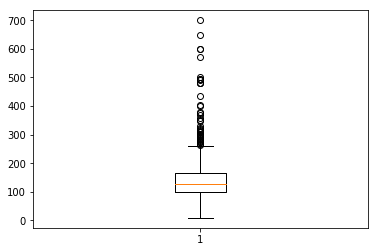

In [23]:
plt.boxplot(data["LoanAmount"])

In [24]:
temp1=data["Credit_History"].value_counts()
temp1

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [25]:
temp2=data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())

In [26]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.790476


We can say that the credit history having 1 is having most probable loan approval

In [27]:
temp3=data.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean()*100)

In [28]:
temp3

,Loan_Status
Education,
Graduate,70.833333
Not Graduate,61.194030


We can say that there is no relation between the loan approval of graduated and not graduated.We can conclude that loan is not depend on eduaction

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

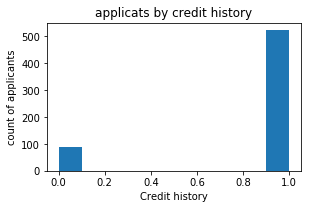

In [29]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(221)
plt.xlabel('Credit history')
plt.ylabel('count of applicants')
plt.title('applicats by credit history')
plt.hist(data['Credit_History'])




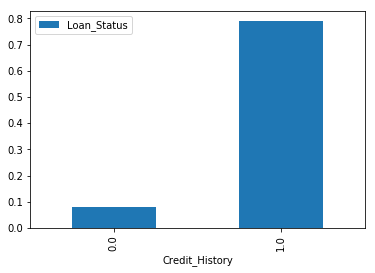

In [30]:
temp2.plot(kind='bar')

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
from sklearn.preprocessing import LabelEncoder


In [32]:
logmodel=LogisticRegression()
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [33]:
x_train=data.drop('Loan_Status',axis=1)

In [34]:
y_train=data['Loan_Status']


In [35]:
test_data["Married"].fillna(value='Yes',inplace=True)
test_data["Gender"].fillna(value='Male',axis=0,inplace=True)
test_data['LoanAmount'].fillna(value=128.0,axis=0,inplace=True)
test_data["Self_Employed"].fillna(value='No',axis=0,inplace=True)
test_data['Loan_Amount_Term'].fillna(value=360,axis=0,inplace=True)
test_data["Credit_History"].fillna(value=1.0,axis=0,inplace=True)
test_data["Dependents"]=data["Dependents"].replace('3+','3')
test_data["Dependents"].fillna(value=0,inplace=True,axis=0)

In [36]:
logmodel=LogisticRegression()
from sklearn.preprocessing import LabelEncoder
var_mod1=['Gender','Married','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in var_mod1:
    test_data[i]=le.fit_transform(test_data[i])

In [37]:
x_test=test_data

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
logmodel=LinearRegression()

In [40]:
logmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predictions=logmodel.predict(x_test)

connecting the predicted data to the test data set

In [57]:
for i in range(len(predictions)):
    if predictions[i] <= 0.5:
        predictions[i] = 0
    else:
        predictions[i] = 1
   

In [64]:
test_data['loan'] = predictions.astype(int)

In [65]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
LP001022,1,1,0,0,0,3076,1500,126.0,360.0,1.0,2,1
LP001031,1,1,0,0,0,5000,1800,208.0,360.0,1.0,2,1
LP001035,1,1,0,0,0,2340,2546,100.0,360.0,1.0,2,1
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,1
LP001055,0,0,0,1,0,2226,0,59.0,360.0,1.0,1,1
LP001056,1,1,0,1,0,3881,0,147.0,360.0,0.0,0,0
LP001059,1,1,0,0,0,13633,0,280.0,240.0,1.0,2,1
